In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

backend = provider.get_backend('ibmq_qasm_simulator')

ibmqfactory.load_account:WARNING:2022-10-20 09:28:34,728: Credentials are already in use. The existing account in the session will be replaced.


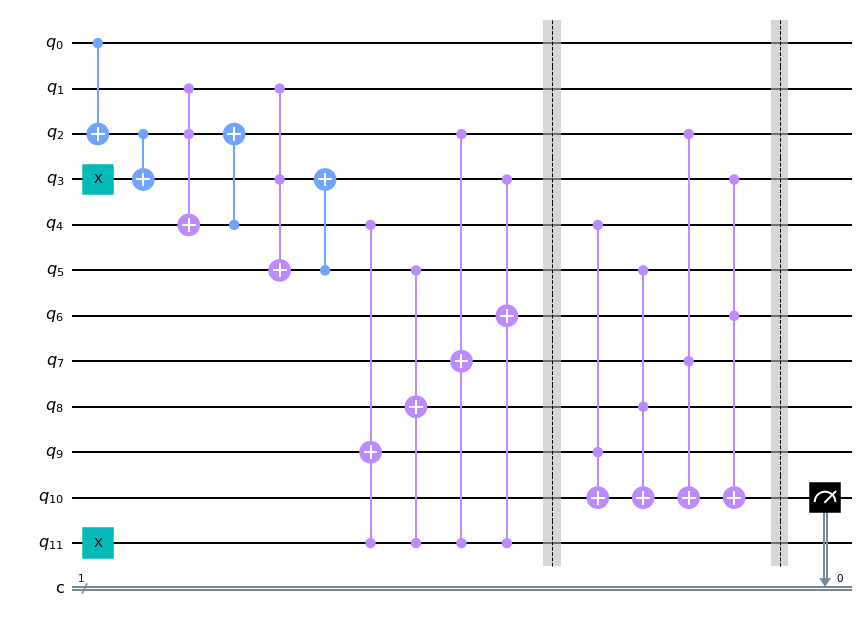

In [8]:
q = QuantumRegister(12, 'q')
c = ClassicalRegister(1, 'c')

circuit = QuantumCircuit(q,c)

### Addressing ###

#q[0],q[1] -> Memory cell
#  0    0  -> 00
#  0    1  -> 01
#  1    0  -> 10
#  1    1  -> 11

# circuit.x(q[0])
# circuit.x(q[1])

### Routing nodes ####
circuit.cx(q[0],q[2])
circuit.x(q[3])
circuit.cx(q[2],q[3])

circuit.ccx(q[1],q[2],q[4])
circuit.cx(q[4],q[2])

circuit.ccx(q[1],q[3],q[5])
circuit.cx(q[5],q[3])

circuit.x(q[11]) #Write mode (read mode if commented)

### Writing to memory cell ###
circuit.ccx(q[11],q[4],q[9])
circuit.ccx(q[11],q[5],q[8])
circuit.ccx(q[11],q[2],q[7])
circuit.ccx(q[11],q[3],q[6])

circuit.barrier(q)

### Reading memory cell ###
circuit.ccx(q[4],q[9],q[10])
circuit.ccx(q[5],q[8],q[10])
circuit.ccx(q[2],q[7],q[10])
circuit.ccx(q[3],q[6],q[10])

circuit.barrier(q)
circuit.measure(q[10],c[0]) # Measuring readout qubit 

circuit.draw(output='mpl', filename='QRAM.png')


In [9]:
job = execute(circuit, backend, shots=100)
job_monitor(job)

counts = job.result().get_counts()

print(circuit)
print(counts)

print('Output after writing to memory 00 and then reading the same cell')

Job Status: job has successfully run
                                                         ░                     »
 q_0: ──■────────────────────────────────────────────────░─────────────────────»
        │                                                ░                     »
 q_1: ──┼─────────■─────────■────────────────────────────░─────────────────────»
      ┌─┴─┐       │  ┌───┐  │                            ░                     »
 q_2: ┤ X ├──■────■──┤ X ├──┼───────────────────■────────░─────────────■───────»
      ├───┤┌─┴─┐  │  └─┬─┘  │  ┌───┐            │        ░             │       »
 q_3: ┤ X ├┤ X ├──┼────┼────■──┤ X ├────────────┼────■───░─────────────┼────■──»
      └───┘└───┘┌─┴─┐  │    │  └─┬─┘            │    │   ░             │    │  »
 q_4: ──────────┤ X ├──■────┼────┼────■─────────┼────┼───░───■─────────┼────┼──»
                └───┘     ┌─┴─┐  │    │         │    │   ░   │         │    │  »
 q_5: ────────────────────┤ X ├──■────┼────■────┼────┼───░───┼────■────┼